# 📊 Exploración Inicial - Modelo de Conversión Agencia de Empleo

**Objetivo:** Predecir qué registros de intermediación laboral se convertirán en colocaciones exitosas.

**Dataset:** `tb_modelo_conversion_intermediacion` (182,562 registros)

**Variable objetivo:** `conversion` (46.96% tasa de conversión)

## 1. Importar librerías

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Agregar el directorio src al path
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

# Importar módulo de base de datos
from database import get_engine, query_to_dataframe

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas exitosamente")

✅ Librerías importadas exitosamente


## 2. Cargar datos desde la base de datos

In [2]:
# Crear engine de conexión
engine = get_engine()

# Query para extraer los datos
query = """
SELECT *
FROM tb_modelo_conversion_intermediacion
"""

# Cargar datos
df = query_to_dataframe(query, engine)

print(f"\n📦 Dataset cargado: {df.shape[0]:,} filas × {df.shape[1]} columnas")

✅ Engine SQLAlchemy creado exitosamente
✅ Query ejecutado exitosamente. Filas: 158331

📦 Dataset cargado: 158,331 filas × 32 columnas


## 3. Información general del dataset

In [3]:
# Primeras filas
print("\n📋 Primeras 5 filas del dataset:")
display(df.head())


📋 Primeras 5 filas del dataset:


,id,no_documento,codigo_unico_vacante,tipo_de_gestion,numero_de_vacantes_original,cargo_original,empresa_original,requisito_profesional_original,persona_contacto_empresa,hora_entrevista_original,fecha_asignacion,documentacion_requerida_original,rango_vacantes,categoria_cargo,categoria_empresa,categoria_requisito,tiene_contacto_empresa,franja_hora_entrevista,categoria_documentacion,tipo_contacto,homologacion_tipificacion,contacto,gestionado,sin_gestion,no_contacto,efectividad,intentos,duracion_llamada,fuente,conversion,fecha_creacion,fecha_actualizacion
0,1,1000455742,10004557421626139760-143,CONVOCATORIA,15,AUXILIAR LOGISTICO,COMPLEMENTOS HUMANOS SAS,Bachiller Academico,jenny rodriguez,08:00AM,2025-08-20,Hoja de vida actualizada cedula de ciudadania ...,1-100,bodega_logistica,servicios_temporales,bachiller,1,manana,basica,Contacto,Acepta vacante,1,1,0,0,1,8.00,NaN,Soul,1,2025-12-15 15:12:05,2025-12-15 15:12:05
1,2,1000623692,10006236921626139760-143,CONVOCATORIA,15,AUXILIAR LOGISTICO,COMPLEMENTOS HUMANOS SAS,Bachiller Academico,jenny rodriguez,08:00AM,2025-08-20,Hoja de vida actualizada cedula de ciudadania ...,1-100,bodega_logistica,servicios_temporales,bachiller,1,manana,basica,Contacto,Acepta vacante,1,1,0,0,1,4.00,NaN,Soul,1,2025-12-15 15:12:05,2025-12-15 15:12:05
2,3,1000623692,10006236921626139760-143,CONVOCATORIA,15,AUXILIAR LOGISTICO,COMPLEMENTOS HUMANOS SAS,Bachiller Academico,jenny rodriguez,08:00AM,2025-08-20,Hoja de vida actualizada cedula de ciudadania ...,1-100,bodega_logistica,servicios_temporales,bachiller,1,manana,basica,Contacto,Acepta vacante,1,1,0,0,1,4.00,NaN,Soul,1,2025-12-15 15:12:05,2025-12-15 15:12:05
3,4,1000365271,10003652711626139760-143,CONVOCATORIA,15,AUXILIAR LOGISTICO,COMPLEMENTOS HUMANOS SAS,Bachiller Academico,jenny rodriguez,08:00AM,2025-08-20,Hoja de vida actualizada cedula de ciudadania ...,1-100,bodega_logistica,servicios_temporales,bachiller,1,manana,basica,Contacto,Acepta vacante,1,1,0,0,1,4.00,NaN,Soul,1,2025-12-15 15:12:05,2025-12-15 15:12:05
4,5,1000455742,10004557421626139760-143,CONVOCATORIA,15,AUXILIAR LOGISTICO,COMPLEMENTOS HUMANOS SAS,Bachiller Academico,jenny rodriguez,08:00AM,2025-08-20,Hoja de vida actualizada cedula de ciudadania ...,1-100,bodega_logistica,servicios_temporales,bachiller,1,manana,basica,Contacto,Acepta vacante,1,1,0,0,1,8.00,NaN,Soul,1,2025-12-15 15:12:05,2025-12-15 15:12:05


In [4]:
# Información general
print("\n📊 Información general del dataset:")
df.info()


📊 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158331 entries, 0 to 158330
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id                                158331 non-null  int64         
 1   no_documento                      158331 non-null  object        
 2   codigo_unico_vacante              158331 non-null  object        
 3   tipo_de_gestion                   158331 non-null  object        
 4   numero_de_vacantes_original       158331 non-null  object        
 5   cargo_original                    158331 non-null  object        
 6   empresa_original                  158331 non-null  object        
 7   requisito_profesional_original    158331 non-null  object        
 8   persona_contacto_empresa          158331 non-null  object        
 9   hora_entrevista_original          158331 non-null  object        
 

In [5]:
# Valores nulos
print("\n🔍 Valores nulos por columna:")
nulls = df.isnull().sum()
nulls_pct = (nulls / len(df)) * 100
nulls_df = pd.DataFrame({
    'Columna': nulls.index,
    'Nulos': nulls.values,
    'Porcentaje': nulls_pct.values
}).sort_values('Nulos', ascending=False)

display(nulls_df[nulls_df['Nulos'] > 0])


🔍 Valores nulos por columna:


,Columna,Nulos,Porcentaje
27,duracion_llamada,61146,38.62
26,intentos,14,0.01


## 4. Análisis de la variable objetivo (Conversion)


🎯 Distribución de la variable objetivo (Conversion):


,Valor,Cantidad,Porcentaje
0,No Conversión (0),83146,52.51
1,Conversión (1),75185,47.49


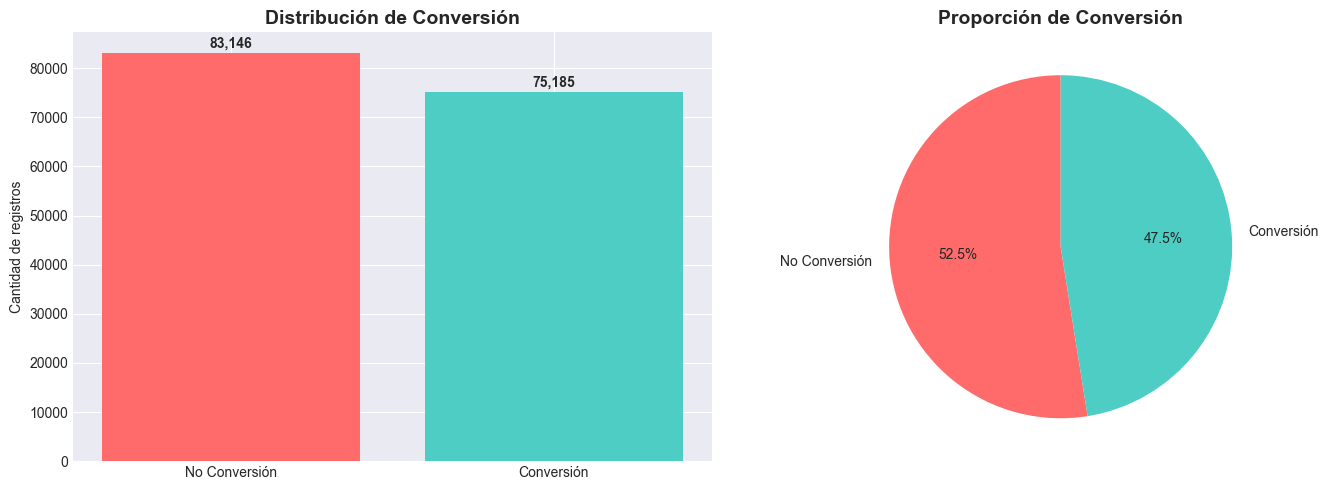


✅ Dataset relativamente balanceado: 47.49% de conversiones


In [6]:
# Distribución de conversión
print("\n🎯 Distribución de la variable objetivo (Conversion):")
conversion_counts = df['conversion'].value_counts()
conversion_pct = df['conversion'].value_counts(normalize=True) * 100

conversion_summary = pd.DataFrame({
    'Valor': ['No Conversión (0)', 'Conversión (1)'],
    'Cantidad': conversion_counts.values,
    'Porcentaje': conversion_pct.values
})

display(conversion_summary)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(['No Conversión', 'Conversión'], conversion_counts.values, color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Distribución de Conversión', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cantidad de registros')
for i, v in enumerate(conversion_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Gráfico de pastel
axes[1].pie(conversion_counts.values, labels=['No Conversión', 'Conversión'], 
            autopct='%1.1f%%', startangle=90, colors=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Proporción de Conversión', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Dataset relativamente balanceado: {conversion_pct[1]:.2f}% de conversiones")

## 5. Estadísticas descriptivas de variables numéricas

In [7]:
# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\n📈 Estadísticas descriptivas de variables numéricas:")
display(df[numeric_cols].describe())


📈 Estadísticas descriptivas de variables numéricas:


,id,tiene_contacto_empresa,contacto,gestionado,sin_gestion,no_contacto,efectividad,intentos,duracion_llamada,conversion
count,158331.00,158331.00,158331.00,158331.00,158331.00,158331.00,158331.00,158317.00,97185.00,158331.00
mean,79166.00,0.74,0.54,1.00,0.00,0.46,0.49,11.84,20.00,0.47
std,45706.37,0.44,0.50,0.00,0.00,0.50,0.50,9.99,52.39,0.50
min,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,39583.50,0.00,0.00,1.00,0.00,0.00,0.00,4.00,0.00,0.00
50%,79166.00,1.00,1.00,1.00,0.00,0.00,0.00,10.00,0.00,0.00
75%,118748.50,1.00,1.00,1.00,0.00,1.00,1.00,16.00,13.00,1.00
max,158331.00,1.00,1.00,1.00,0.00,1.00,1.00,65.00,4800.00,1.00


## 6. Análisis de variables categóricas principales

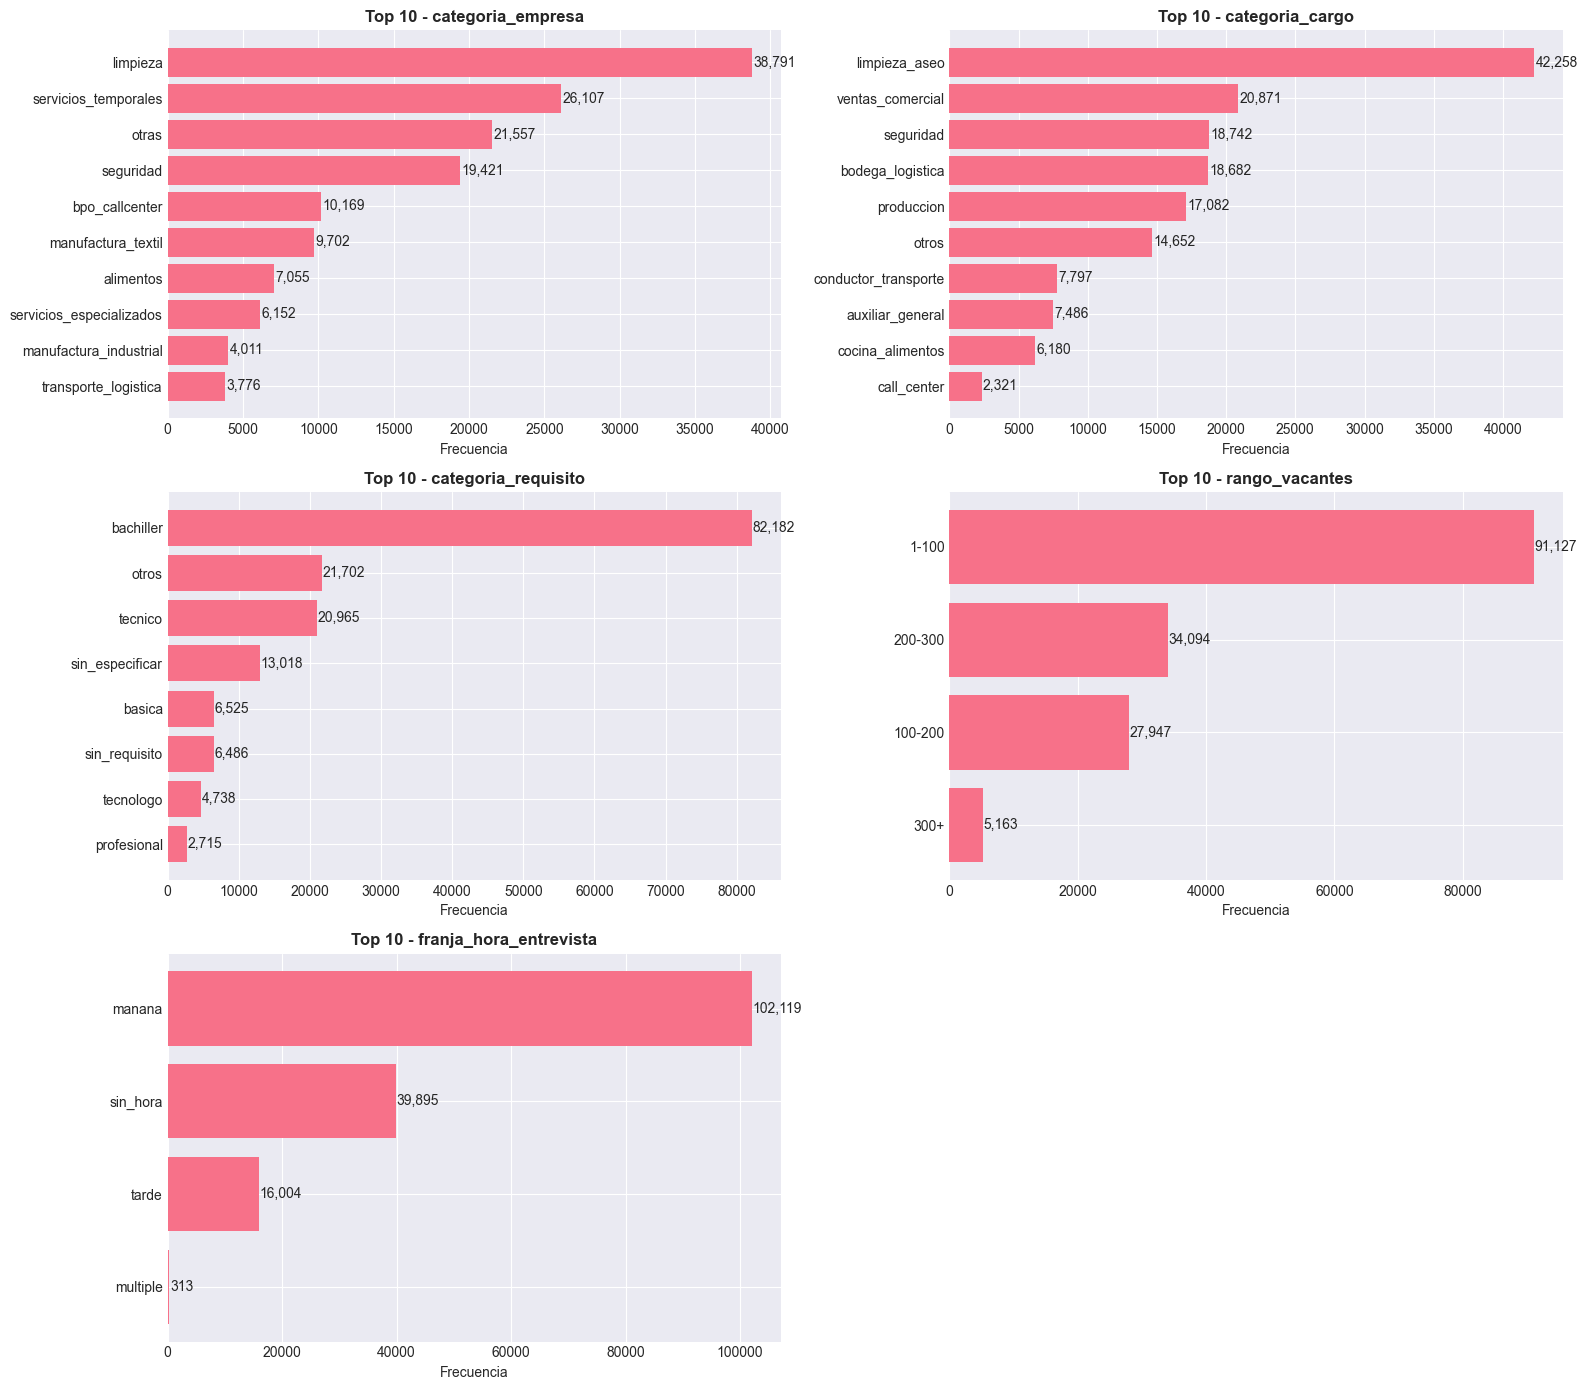

In [8]:
# Distribución de categorías principales
categorical_features = [
    'categoria_empresa',
    'categoria_cargo',
    'categoria_requisito',
    'rango_vacantes',
    'franja_hora_entrevista'
]

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts().head(10)
    axes[idx].barh(range(len(value_counts)), value_counts.values)
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index)
    axes[idx].set_xlabel('Frecuencia')
    axes[idx].set_title(f'Top 10 - {col}', fontweight='bold')
    axes[idx].invert_yaxis()
    
    # Agregar valores en las barras
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v + 100, i, f'{v:,}', va='center')

# Ocultar el último subplot si no se usa
if len(categorical_features) < 6:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 7. Análisis de conversión por categoría

In [9]:
# Tasa de conversión por categoría de empresa
print("\n📊 Tasa de conversión por categoría de empresa:")
conversion_by_empresa = df.groupby('categoria_empresa').agg({
    'conversion': ['sum', 'count', 'mean']
}).round(4)
conversion_by_empresa.columns = ['Conversiones', 'Total', 'Tasa']
conversion_by_empresa['Tasa_%'] = conversion_by_empresa['Tasa'] * 100
conversion_by_empresa = conversion_by_empresa.sort_values('Tasa_%', ascending=False)

display(conversion_by_empresa)


📊 Tasa de conversión por categoría de empresa:


,Conversiones,Total,Tasa,Tasa_%
categoria_empresa,,,,
salud,230,376,0.61,61.17
cobranza,780,1318,0.59,59.18
bpo_callcenter,5425,10169,0.53,53.35
limpieza,19733,38791,0.51,50.87
manufactura_textil,4847,9702,0.50,49.96
transporte_logistica,1855,3776,0.49,49.13
construccion,370,763,0.48,48.49
ventas_comercial,921,1965,0.47,46.87
manufactura_industrial,1862,4011,0.46,46.42


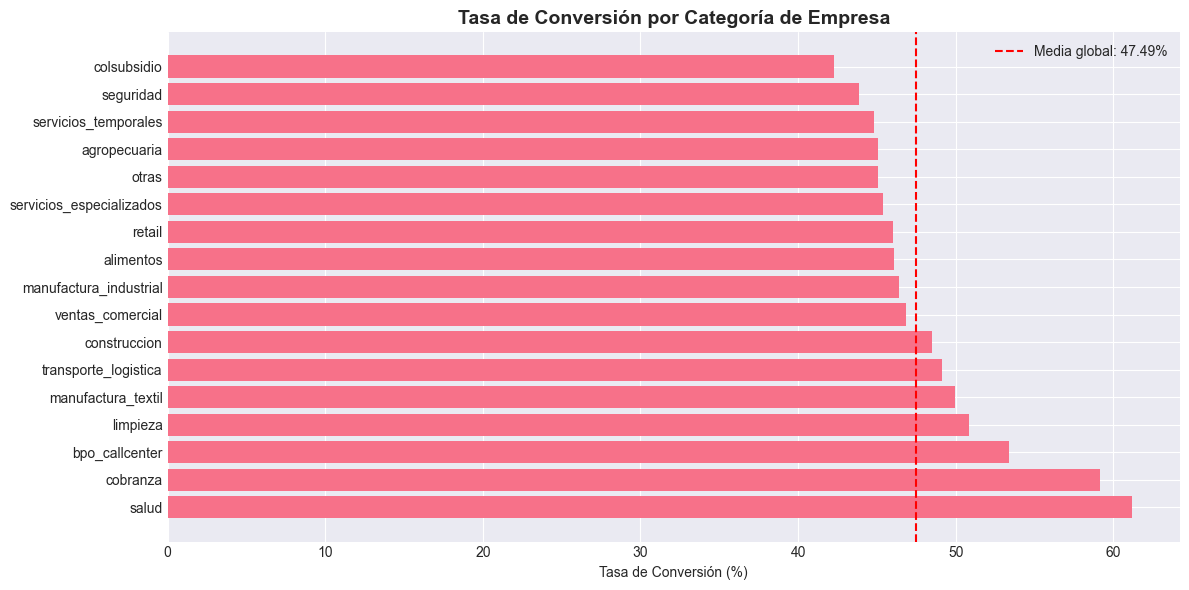

In [10]:
# Visualización de tasa de conversión por empresa
plt.figure(figsize=(12, 6))
plt.barh(conversion_by_empresa.index, conversion_by_empresa['Tasa_%'])
plt.xlabel('Tasa de Conversión (%)')
plt.title('Tasa de Conversión por Categoría de Empresa', fontsize=14, fontweight='bold')
plt.axvline(x=df['conversion'].mean() * 100, color='red', linestyle='--', label=f'Media global: {df["conversion"].mean()*100:.2f}%')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Tasa de conversión por categoría de cargo
print("\n📊 Tasa de conversión por categoría de cargo:")
conversion_by_cargo = df.groupby('categoria_cargo').agg({
    'conversion': ['sum', 'count', 'mean']
}).round(4)
conversion_by_cargo.columns = ['Conversiones', 'Total', 'Tasa']
conversion_by_cargo['Tasa_%'] = conversion_by_cargo['Tasa'] * 100
conversion_by_cargo = conversion_by_cargo.sort_values('Tasa_%', ascending=False)

display(conversion_by_cargo)


📊 Tasa de conversión por categoría de cargo:


,Conversiones,Total,Tasa,Tasa_%
categoria_cargo,,,,
tecnico,735,1172,0.63,62.71
profesional_salud,174,317,0.55,54.89
call_center,1271,2321,0.55,54.76
cajero,419,771,0.54,54.35
limpieza_aseo,21459,42258,0.51,50.78
otros,7240,14652,0.49,49.41
ventas_comercial,10280,20871,0.49,49.25
produccion,7825,17082,0.46,45.81
auxiliar_general,3313,7486,0.44,44.26


## 8. Análisis temporal


📅 Conversión por mes:


,Conversiones,Total,Tasa,Tasa_%
mes,,,,
2025-08,5243,14754,0.36,35.54
2025-09,27087,56694,0.48,47.78
2025-10,20904,40843,0.51,51.18
2025-11,21674,44253,0.49,48.98
2025-12,277,1787,0.16,15.50


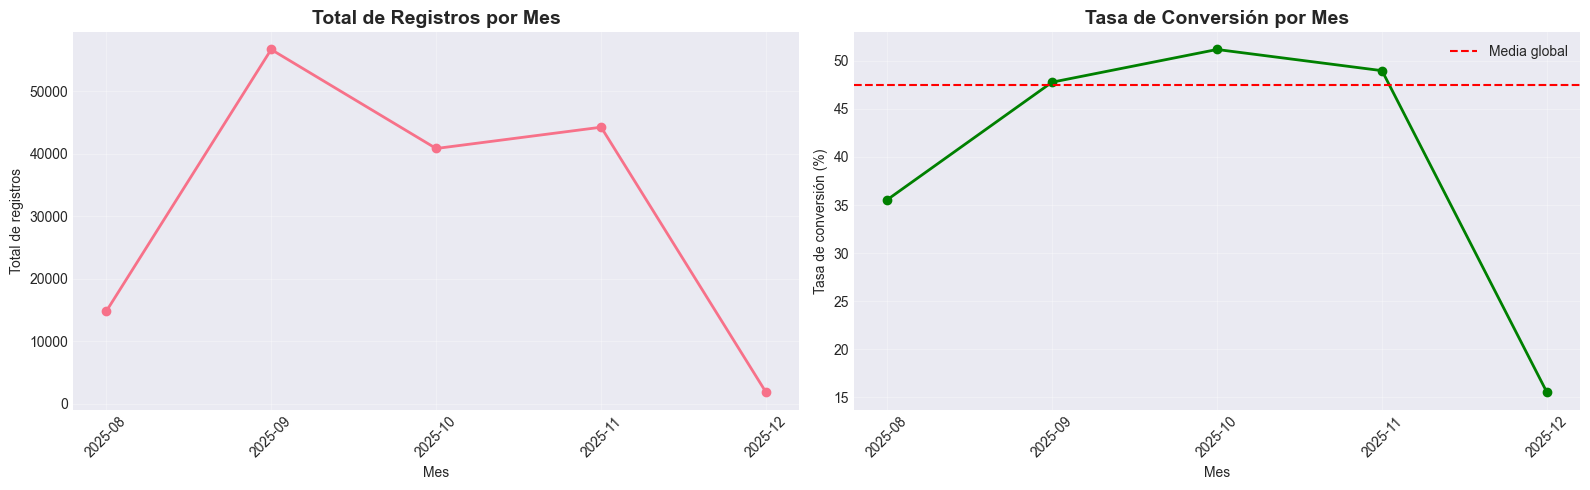

In [12]:
# Conversión por mes
df['mes'] = pd.to_datetime(df['fecha_asignacion']).dt.to_period('M')

conversion_by_month = df.groupby('mes').agg({
    'conversion': ['sum', 'count', 'mean']
})
conversion_by_month.columns = ['Conversiones', 'Total', 'Tasa']
conversion_by_month['Tasa_%'] = conversion_by_month['Tasa'] * 100

print("\n📅 Conversión por mes:")
display(conversion_by_month)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Total de registros por mes
axes[0].plot(conversion_by_month.index.astype(str), conversion_by_month['Total'], marker='o', linewidth=2)
axes[0].set_title('Total de Registros por Mes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Total de registros')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Tasa de conversión por mes
axes[1].plot(conversion_by_month.index.astype(str), conversion_by_month['Tasa_%'], marker='o', linewidth=2, color='green')
axes[1].set_title('Tasa de Conversión por Mes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Tasa de conversión (%)')
axes[1].axhline(y=df['conversion'].mean() * 100, color='red', linestyle='--', label='Media global')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Resumen de hallazgos iniciales

In [13]:
print("\n" + "="*70)
print("📋 RESUMEN DE HALLAZGOS INICIALES")
print("="*70)

print(f"\n1️⃣ Dataset:")
print(f"   - Total de registros: {len(df):,}")
print(f"   - Período: {df['fecha_asignacion'].min()} a {df['fecha_asignacion'].max()}")
print(f"   - Tasa de conversión global: {df['conversion'].mean()*100:.2f}%")

print(f"\n2️⃣ Balance de clases:")
print(f"   - Conversiones (1): {df['conversion'].sum():,} ({df['conversion'].mean()*100:.2f}%)")
print(f"   - No conversiones (0): {(df['conversion']==0).sum():,} ({(1-df['conversion'].mean())*100:.2f}%)")
print(f"   - ✅ Dataset relativamente balanceado (no requiere SMOTE obligatorio)")

print(f"\n3️⃣ Categoría de empresa con mejor conversión:")
best_empresa = conversion_by_empresa.iloc[0]
print(f"   - {conversion_by_empresa.index[0]}: {best_empresa['Tasa_%']:.2f}%")

print(f"\n4️⃣ Categoría de cargo con mejor conversión:")
best_cargo = conversion_by_cargo.iloc[0]
print(f"   - {conversion_by_cargo.index[0]}: {best_cargo['Tasa_%']:.2f}%")

print(f"\n5️⃣ Valores nulos:")
if nulls_df[nulls_df['Nulos'] > 0].empty:
    print(f"   - ✅ No hay valores nulos en el dataset")
else:
    print(f"   - ⚠️ {len(nulls_df[nulls_df['Nulos'] > 0])} columnas con valores nulos")

print("\n" + "="*70)


📋 RESUMEN DE HALLAZGOS INICIALES

1️⃣ Dataset:
   - Total de registros: 158,331
   - Período: 2025-08-19 a 2025-12-04
   - Tasa de conversión global: 47.49%

2️⃣ Balance de clases:
   - Conversiones (1): 75,185 (47.49%)
   - No conversiones (0): 83,146 (52.51%)
   - ✅ Dataset relativamente balanceado (no requiere SMOTE obligatorio)

3️⃣ Categoría de empresa con mejor conversión:
   - salud: 61.17%

4️⃣ Categoría de cargo con mejor conversión:
   - tecnico: 62.71%

5️⃣ Valores nulos:
   - ⚠️ 2 columnas con valores nulos



## 10. Guardar dataset procesado (opcional)

In [14]:
# Guardar dataset como CSV para análisis posterior
output_path = os.path.join('..', 'data', 'processed', 'datos_modelo_conversion.csv')
df.to_csv(output_path, index=False, encoding='utf-8')
print(f"\n💾 Dataset guardado en: {output_path}")


💾 Dataset guardado en: ..\data\processed\datos_modelo_conversion.csv


---

## ✅ Próximos pasos:

1. **Feature Engineering**: Crear variables derivadas
2. **Análisis de correlaciones**: Ver relaciones entre variables
3. **Modelado**: Entrenar clasificadores (Logistic Regression, Random Forest, XGBoost)
4. **Evaluación**: AUC-ROC, Precision, Recall, F1-Score
5. **Deployment**: Script de predicción diaria